## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Чтение данных

In [2]:
raw_data = pd.read_csv('data/medical_cases.csv')
raw_data

,description,transcription,sample_name,medical_specialty,keywords
0,Patient having severe sinusitis about two to t...,"HISTORY:, I had the pleasure of meeting and e...",Chronic Sinusitis,Allergy / Immunology,NaN
1,A female for a complete physical and follow up...,"SUBJECTIVE: , This is a 42-year-old white fema...",Followup on Asthma,Allergy / Immunology,NaN
2,Mother states he has been wheezing and coughing.,"CHIEF COMPLAINT: , This 5-year-old male presen...",Asthma in a 5-year-old,Allergy / Immunology,NaN
3,"Acute allergic reaction, etiology uncertain, h...","HISTORY: , A 34-year-old male presents today s...",Allergy Evaluation Consult,Allergy / Immunology,NaN
4,"The patient died of a pulmonary embolism, the ...","SUMMARY OF CLINICAL HISTORY:, The patient was...",Autopsy - 8,Autopsy,NaN
...,...,...,...,...,...
4309,"Patient with a diagnosis of pancreatitis, deve...","HISTORY:, The patient was in the intensive ca...",Nephrology Consultation - 3,Consult - History and Phy.,"consult - history and phy., intubated, consult..."
4310,The patient with recurrent nongranulomatous an...,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Uveitis,Consult - History and Phy.,"consult - history and phy., iritis, nongranulo..."
4311,Consultation because of irregular periods and ...,She started her periods at age 13. She is com...,OB/GYN Consultation - 3,Consult - History and Phy.,"consult - history and phy., irregular periods,..."
4312,Pneumatosis coli in the cecum. Possible ische...,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Ischemic Cecum - Consult,Consult - History and Phy.,"consult - history and phy., ischemic cecum, me..."


Посчет слов и предложений

In [3]:
from src.data_cleaning import count_sentences, count_words


medical_transcriptions = raw_data[raw_data['transcription'].notna()]

sent_cnt = count_sentences(medical_transcriptions.values.tolist())
word_count = count_words(medical_transcriptions.values.tolist())

print(
    'Number of sentences in transcriptions column: %d' % sent_cnt,
    'Number of unique words in transcriptions column: %d' % word_count,
    sep='\n',
)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of sentences in transcriptions column: 163198
Number of unique words in transcriptions column: 35400


Просмотр категорий

In [4]:
data_categories = medical_transcriptions.groupby(medical_transcriptions['medical_specialty'])

print('Original Categories:')
for i, k in enumerate(data_categories):
    c_name, c_data = k
    print('Category %d: %s %d' % (i, c_name, len(c_data)))

Original Categories:
Category 0: Allergy / Immunology 14
Category 1: Autopsy 16
Category 2: Cardiovascular / Pulmonary 742
Category 3: Consult - History and Phy. 915
Category 4: Cosmetic / Plastic Surgery 29
Category 5: Dentistry 30
Category 6: Dermatology 34
Category 7: Diets and Nutritions 10
Category 8: ENT - Otolaryngology 80
Category 9: Emergency Room Reports 121
Category 10: Endocrinology 23
Category 11: Gastroenterology 222
Category 12: General Medicine 347
Category 13: Hematology - Oncology 120
Category 14: Hospice - Palliative Care 7
Category 15: Lab Medicine - Pathology 8
Category 16: Nephrology 71
Category 17: Neurology 282
Category 18: Neurosurgery 109
Category 19: Obstetrics / Gynecology 182
Category 20: Office Notes 60
Category 21: Ophthalmology 66
Category 22: Orthopedic 408
Category 23: Pediatrics - Neonatal 64
Category 24: Physical Medicine - Rehab 20
Category 25: Podiatry 10
Category 26: Psychiatry / Psychology 68
Category 27: Radiology 50
Category 28: Rheumatology 6


## Чистка данных

Удаление редких категорий

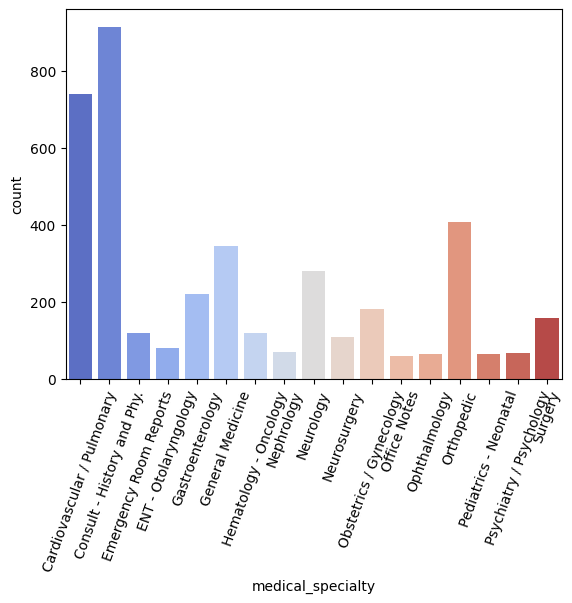

In [5]:
data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = data_categories.groupby(data_categories['medical_specialty'])

plt.figure()
sns.countplot(data=data_categories, x='medical_specialty', palette ='coolwarm')
plt.xticks(rotation=70)
plt.show()

Удаление ненужных данных

In [6]:
data = data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data

,transcription,medical_specialty
12,"REASON FOR CONSULTATION:, Ventricular ectopy ...",Cardiovascular / Pulmonary
13,"CHIEF COMPLAINT:, ""Trouble breathing."",HISTORY...",Cardiovascular / Pulmonary
14,"EXAM: , Transesophageal echocardiogram and dir...",Cardiovascular / Pulmonary
15,"HISTORY: ,I had the pleasure of meeting and e...",Cardiovascular / Pulmonary
16,"On review of systems, the patient admits to hy...",Cardiovascular / Pulmonary
...,...,...
4309,"HISTORY:, The patient was in the intensive ca...",Consult - History and Phy.
4310,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Consult - History and Phy.
4311,She started her periods at age 13. She is com...,Consult - History and Phy.
4312,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Consult - History and Phy.


Просмотр транскрипций для обнаружения ненужных элементов

In [7]:
print(
    'Transcription 1: ' + data.iloc[5]['transcription'],
    'Transcription 2: ' + data.iloc[125]['transcription'],
    sep='\n')

Transcription 1: PROTOCOL:,  Bruce.,PERTINENT MEDICATION: , None.,REASON FOR TEST:,  Chest pain.,PROCEDURE AND INTERPRETATION: ,1.  Baseline heart rate:  67.,2.  Baseline blood pressure:  150/86.,3.  Total time:  6 minute 51 seconds.,4.  METs:  10.1.,5.  Peak heart rate:  140.,6.  Percent of maximum-predicted heart rate:  90.,7.  Peak blood pressure:  200/92.,8.  Reason test terminated:  Shortness of breath and fatigue.,9.  Estimated aerobic capacity:  Average.,10. Heart rate response:  Normal.,11. Blood pressure response:  Hypertensive.,12. ST segment response:  Normal.,13. Chest pain:  None.,14. Symptoms:  None.,15. Arrhythmia:  None.,CONCLUSION:,1.  Average aerobic capacity.,2.  Normal heart rate and blood pressure response to exercise.,3.  No symptomatic electrocardiographic evidence of ischemia.,CONDITION: , Stable with normal vital signs.,DISPOSITION:  ,The patient was discharged home and was asymptomatic.,
Transcription 2: IDENTIFYING DATA:,  This is a 40-year-old male seen toda

Удаление ненужных символов

In [8]:
from src.data_cleaning import clean_text


transcriptions = data['transcription'].apply(clean_text)

words = set()
for transcription in transcriptions.iloc:
    words.update(transcription.split(' '))

## Векторизация с TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

from src.reporting import vectorization_results

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
docterm_matrix = vectorizer.fit_transform(data['transcription'].tolist())

/home/eshevlyakov/.pyenv/versions/3.10.5/envs/hmlp/lib/python3.10/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


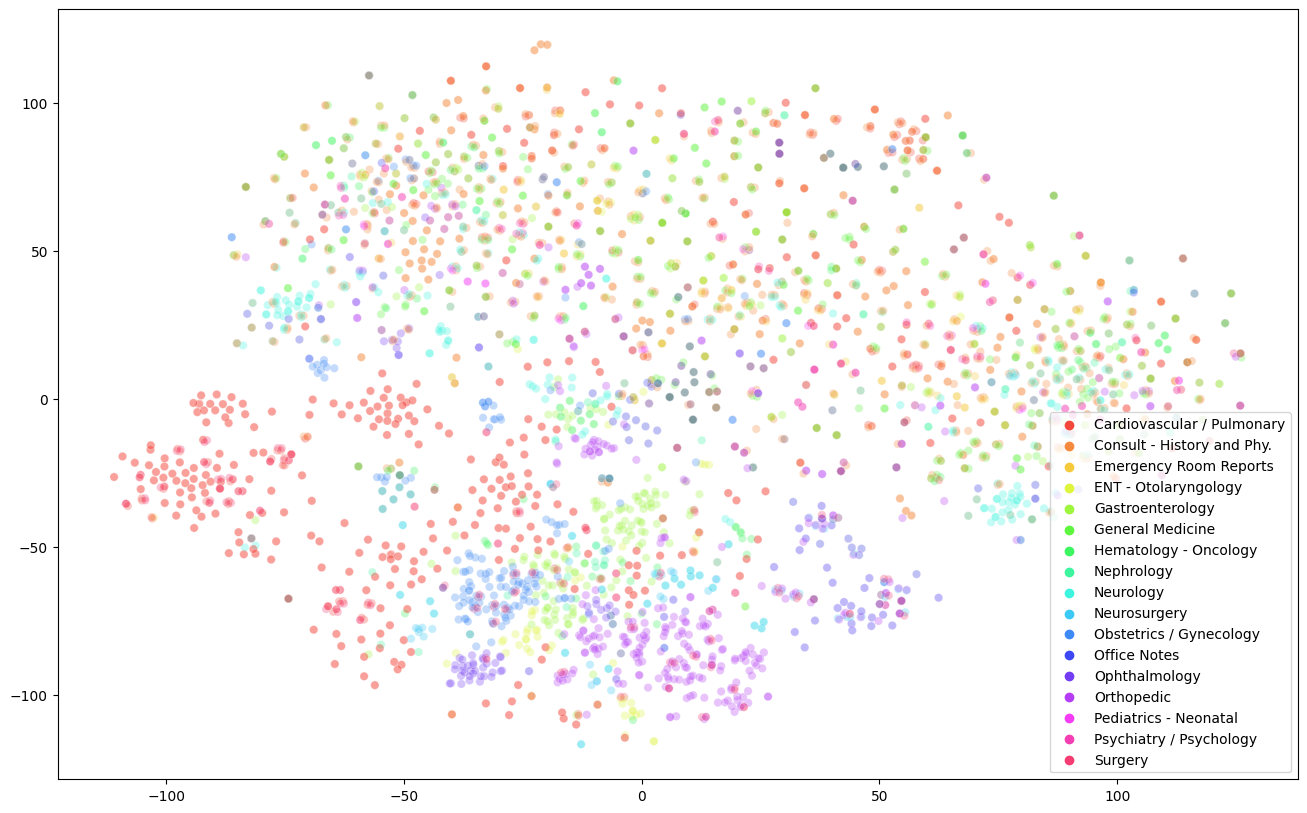

In [16]:
vectorization_results(docterm_matrix.todense(), data['medical_specialty'].tolist())

## Обучение с логистической регрессией

In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src.reporting import learning_results

In [13]:
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(docterm_matrix.toarray())

In [14]:
labels = data['medical_specialty'].tolist()
category_list = data['medical_specialty'].unique()

x_train, x_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels, random_state=1)

clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

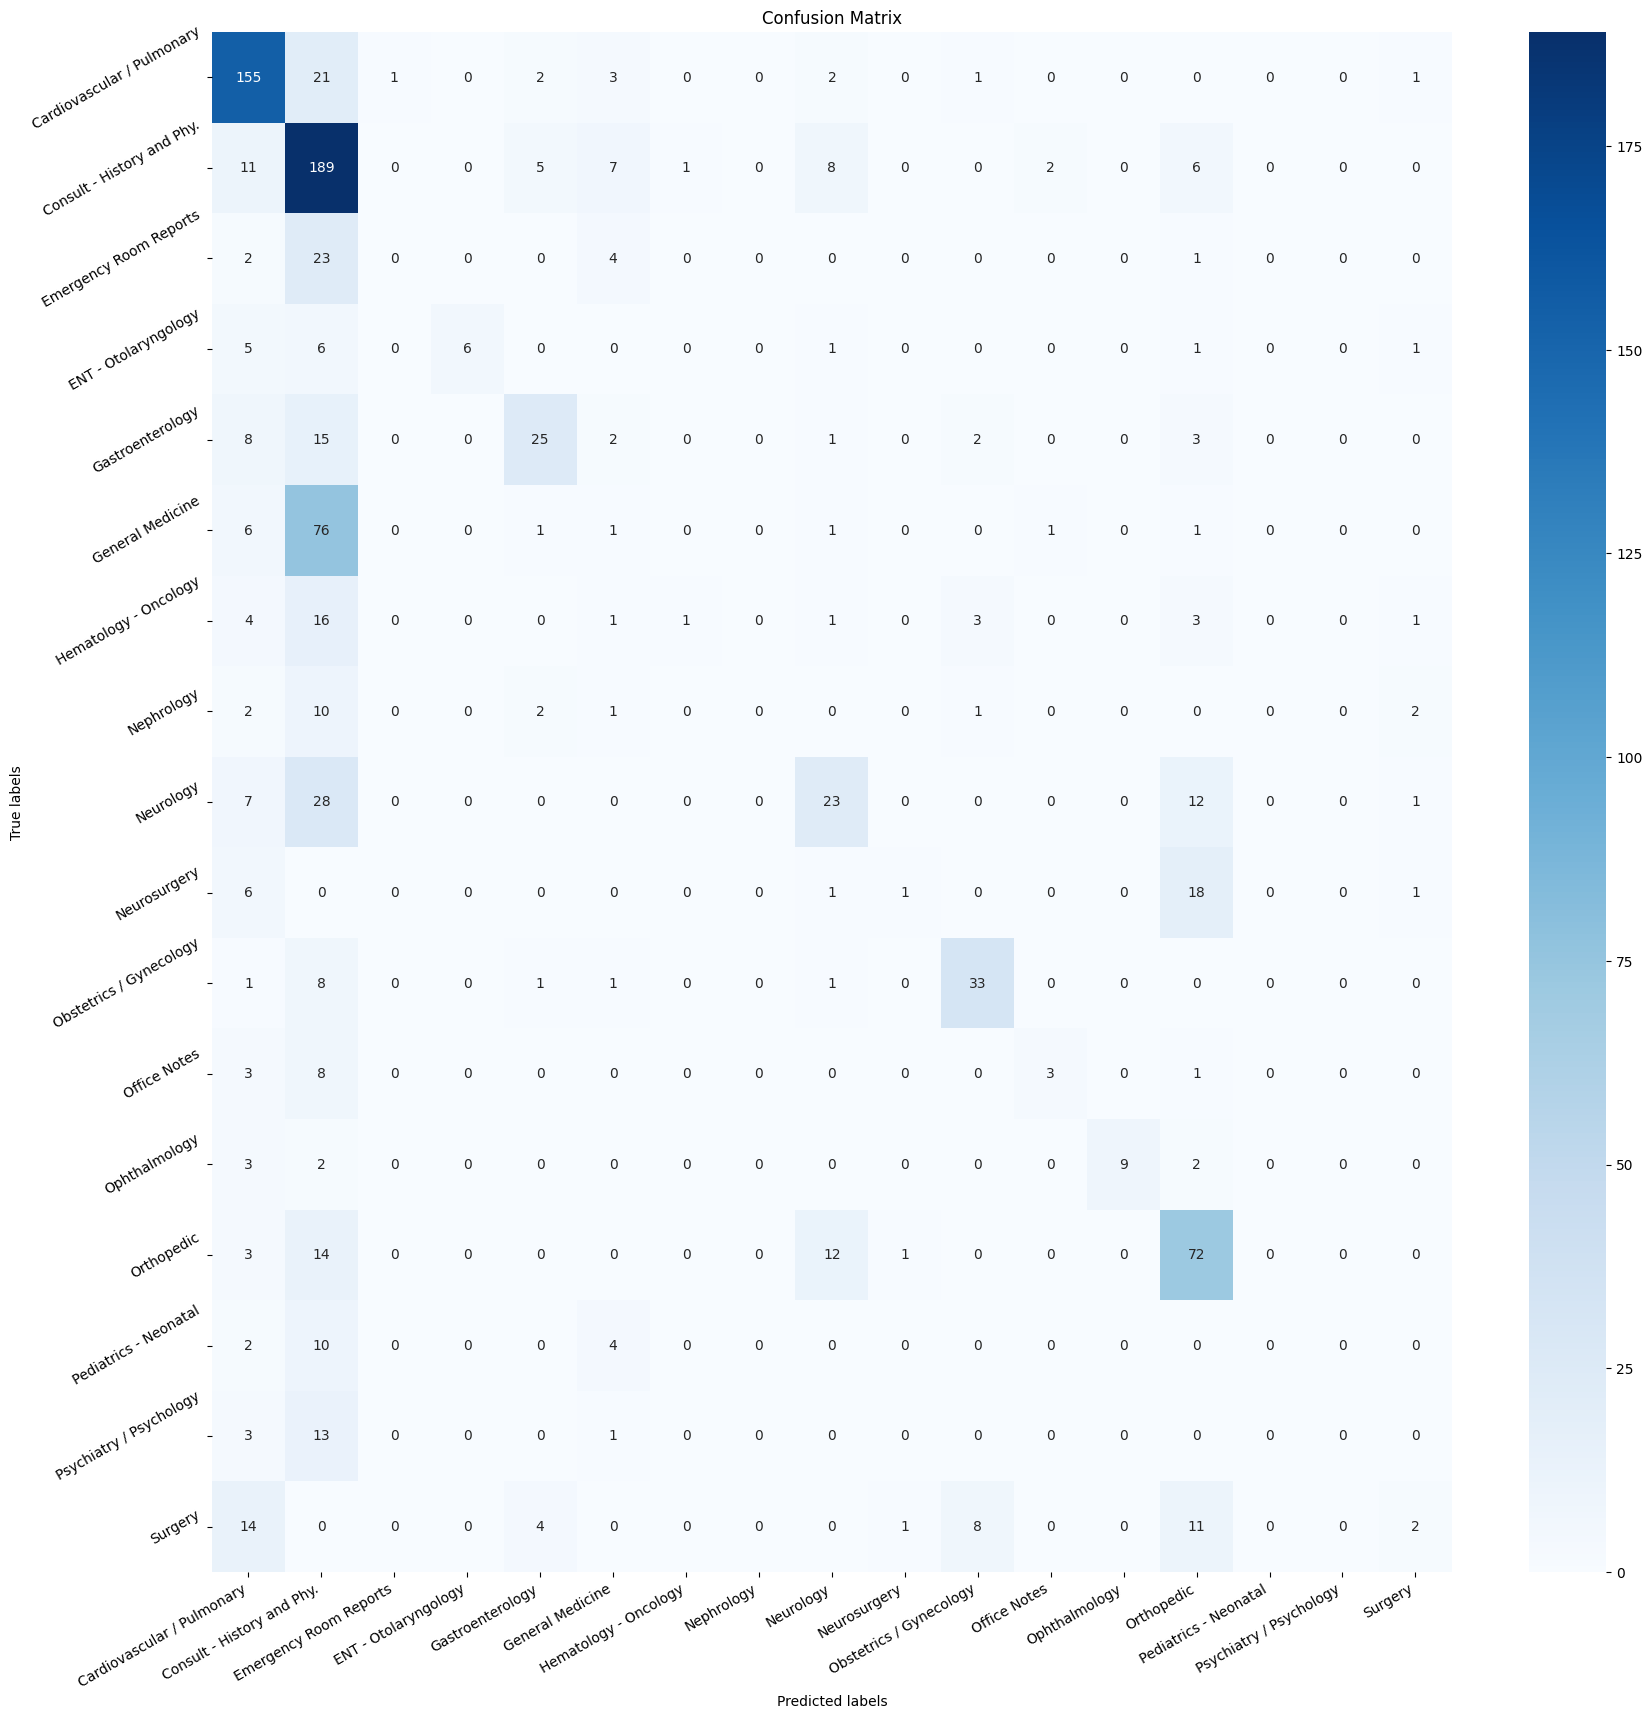

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.66      0.83      0.74       186
Consult - History and Phy.       0.43      0.83      0.57       229
    Emergency Room Reports       0.00      0.00      0.00        30
      ENT - Otolaryngology       1.00      0.30      0.46        20
          Gastroenterology       0.62      0.45      0.52        56
          General Medicine       0.04      0.01      0.02        87
     Hematology - Oncology       0.50      0.03      0.06        30
                Nephrology       0.00      0.00      0.00        18
                 Neurology       0.45      0.32      0.38        71
              Neurosurgery       0.33      0.04      0.07        27
   Obstetrics / Gynecology       0.69      0.73      0.71        45
              Office Notes       0.50      0.20      0.29        15
             Ophthalmology       1.00      0.56      0.72        16
                Orthopedic       0.55      0.71

In [15]:
learning_results(y_test, y_test_pred, category_list)